In [1]:
# retrieved variables from distance search

%store -r phase12_bogota0
%store -r phase23_bogota0
%store -r phase34_bogota0
%store -r phase45_bogota0

%store -r phase12_bogota1
%store -r phase23_bogota1
%store -r phase34_bogota1
%store -r phase45_bogota1

%store -r phase12_bogota2
%store -r phase23_bogota2
%store -r phase34_bogota2
%store -r phase45_bogota2

%store -r phase12_bogota3
%store -r phase23_bogota3
%store -r phase34_bogota3
%store -r phase45_bogota3

In [2]:
# retrived variables from relational novelty

%store -r stage1_bogota0_high_similarity
%store -r stage1_bogota1_high_similarity
%store -r stage1_bogota2_high_similarity
%store -r stage1_bogota3_high_similarity

%store -r stage2_bogota0_high_similarity
%store -r stage2_bogota1_high_similarity
%store -r stage2_bogota2_high_similarity
%store -r stage2_bogota3_high_similarity

%store -r stage3_bogota0_high_similarity
%store -r stage3_bogota1_high_similarity
%store -r stage3_bogota2_high_similarity
%store -r stage3_bogota3_high_similarity

%store -r stage4_bogota0_high_similarity
%store -r stage4_bogota1_high_similarity
%store -r stage4_bogota2_high_similarity
%store -r stage4_bogota3_high_similarity

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stage1_bogota0_high_similarity.rename(columns={'similarity': 's1-high-sim'}, inplace=True)
stage2_bogota0_high_similarity.rename(columns={'similarity': 's2-high-sim'}, inplace=True)
stage3_bogota0_high_similarity.rename(columns={'similarity': 's3-high-sim'}, inplace=True)
stage4_bogota0_high_similarity.rename(columns={'similarity': 's4-high-sim'}, inplace=True)

In [5]:
phase12_bogota0.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota0.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota0.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota0.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [6]:
#df = pd.concat([stage1_bogota0_high_similarity['s1-high-sim'], stage2_bogota0_high_similarity['s2-high-sim'], stage3_bogota0_high_similarity['s3-high-sim'], stage4_bogota0_high_similarity['s4-high-sim'], phase12_bogota0['s1-ind-dist'], phase23_bogota0['s2-ind-dist'], phase34_bogota0['s3-ind-dist'], phase45_bogota0['s4-ind-dist']], axis=1)
#df

In [26]:
df_ind_dist = pd.concat([phase12_bogota0['s1-ind-dist'], phase23_bogota0['s2-ind-dist'], phase34_bogota0['s3-ind-dist'], phase45_bogota0['s4-ind-dist']], axis=1)
df_high_sim = pd.concat([stage1_bogota0_high_similarity['s1-high-sim'], stage2_bogota0_high_similarity['s2-high-sim'], stage3_bogota0_high_similarity['s3-high-sim'], stage4_bogota0_high_similarity['s4-high-sim']], axis=1)
df_high_sim

,s1-high-sim,s2-high-sim,s3-high-sim,s4-high-sim
0,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,0.785415,0.954140


In [58]:
import functools
dfs = [stage1_bogota0_high_similarity[['user2', 's1-high-sim']], stage2_bogota0_high_similarity[['user2', 's2-high-sim']],  stage3_bogota0_high_similarity[['user2', 's3-high-sim']],  stage4_bogota0_high_similarity[['user2', 's4-high-sim']], phase12_bogota0[['user2', 's1-ind-dist']], phase23_bogota0[['user2', 's2-ind-dist']], phase34_bogota0[['user2', 's3-ind-dist']], phase45_bogota0[['user2', 's4-ind-dist']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
df_correct = df_final.drop('user2', axis=1)
df_correct

,s1-high-sim,s2-high-sim,s3-high-sim,s4-high-sim,s1-ind-dist,s2-ind-dist,s3-ind-dist,s4-ind-dist
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,0.138889,0.037172,1.000000,1.000000,0.000000,0.003910
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

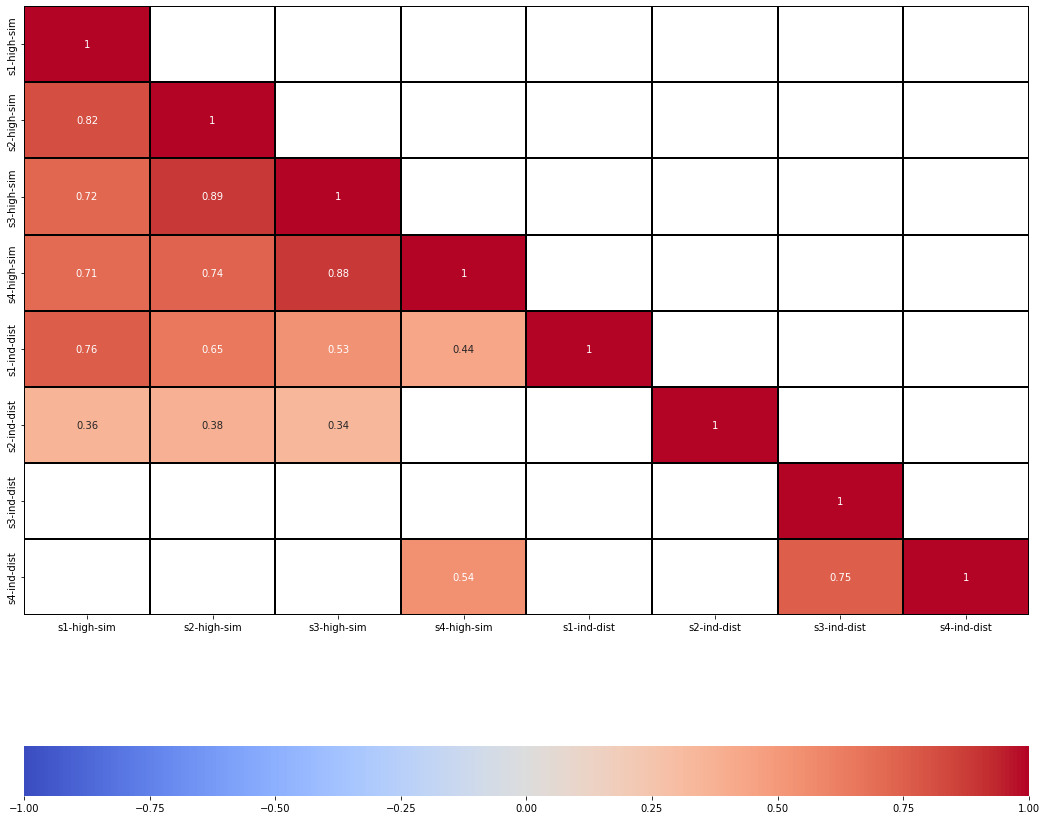

In [60]:
corr = df_correct.corr(method='spearman')                            # get correlation
p_values = corr_sig(df_correct)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)